In [1]:
import katdal
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pickle

In [2]:
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480934843.h5'
#filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480936523.h5'
filename='/var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480942388.h5'

In [3]:
h = katdal.open(filename)

In [4]:
print h

Name: /var/kat/archive2/data/MeerKATAR1/telescope_products/2016/12/05/1480942388.h5 (version 3.0)
Observer: Moloko  Experiment ID: 20161205-0023
Description: 'Generic Phaseup for all targets'
Observed from 2016-12-05 14:53:10.249 SAST to 2016-12-05 14:57:42.134 SAST
Dump rate / period: 0.25011 Hz / 3.998 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m006,m007,m008,m010,m014,m015,m025,m031,m062,m063  20      220
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 L    bc856M4k   1284.000         856.000           4096       208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m008', 'm010', 'm007', 'm014', 'm006', 'm063', 'm015', 'm025', 'm031', 'm062']
  spw=0
-------------------------------------------------------------------------------
Shape: (68 dumps, 4096 channels, 220 correlation produc

In [5]:
# check what cal products we have
print 'Solutions:'
print '    Product             Number of solutions'
for k in h.file['TelescopeState'].keys():
    if 'cal_product' in k:
        print '   ', k, ' --- ' , len(h.file['TelescopeState'][k])

Solutions:
    Product             Number of solutions
    cal_product_B  ---  1
    cal_product_K  ---  1
    cal_product_G  ---  2


In [6]:
np.set_printoptions(precision=4,suppress=True)

In [7]:
# check antenna ordering
print h.file['TelescopeState']['cal_antlist']
a_list=[]
aa=h.file['TelescopeState']['cal_antlist']
for i,ai in enumerate(aa):
    a_list.append(pickle.loads(ai[1]))
a_array=np.array(a_list)
print a_list
print a_array[0]
labels=a_array[0]

<HDF5 dataset "cal_antlist": shape (1,), type "|V136">
[['m006', 'm007', 'm008', 'm010', 'm014', 'm015', 'm025', 'm031', 'm062', 'm063']]
['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm025' 'm031' 'm062' 'm063']


# Delays

In [8]:
k = h.file['TelescopeState']['cal_product_K']
k_list = []
for i, ki in enumerate(k):
    k_list.append(pickle.loads(ki[1]))
k_array = np.array(k_list)

k_0 = k_array[:,0,:]*1e9
k_1 = k_array[:,1,:]*1e9

In [9]:
k_array.shape #Times,Pols,Antennas

(1, 2, 10)

In [10]:
# print delays (if there are few delays)
print 'POL 0: \n', k_0[0], "\n",k_0[-1]
print 'POL 1: \n', k_1[0],"\n" ,k_1[-1]

POL 0: 
[-386.2034 -407.8095 -378.331  -389.2747 -385.8544 -385.8327    0.
  234.1503 -376.5577 -383.1784] 
[-386.2034 -407.8095 -378.331  -389.2747 -385.8544 -385.8327    0.
  234.1503 -376.5577 -383.1784]
POL 1: 
[-383.0977 -404.8654 -374.5868 -382.8334 -381.0209 -382.869     0.
  238.1399 -377.1473 -380.2541] 
[-383.0977 -404.8654 -374.5868 -382.8334 -381.0209 -382.869     0.
  238.1399 -377.1473 -380.2541]


In [11]:
print labels

['m006' 'm007' 'm008' 'm010' 'm014' 'm015' 'm025' 'm031' 'm062' 'm063']


In [12]:
colors=['r','g','b','c','m','k','darkorange','darkgreen','maroon','darkviolet','olive','saddlebrown','darkorchid']

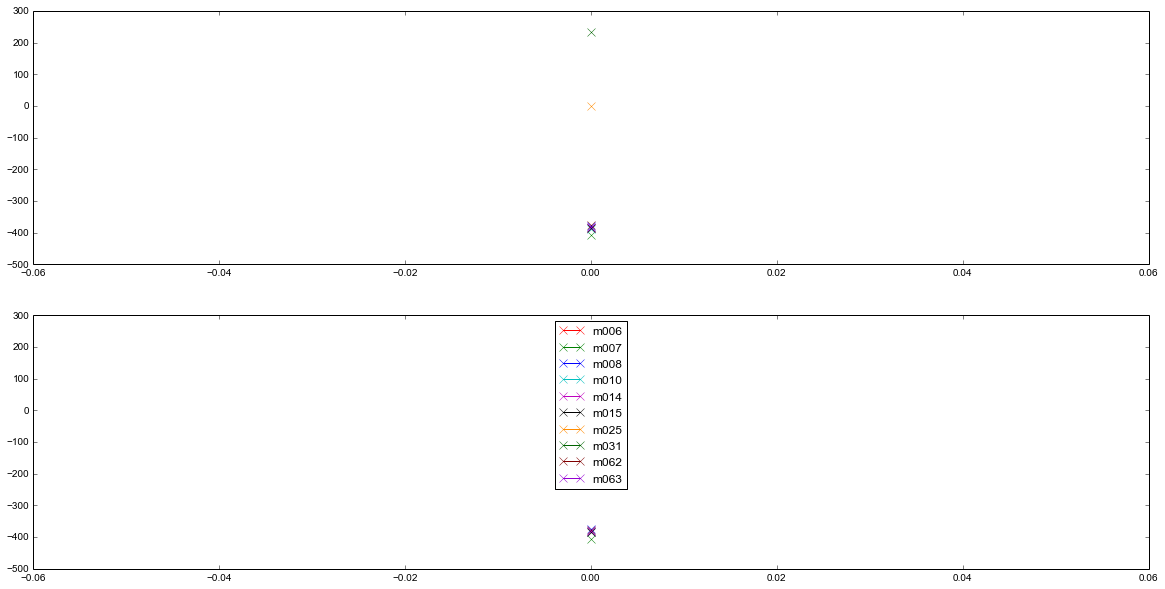

In [13]:
#plot delays (if there are many delays)
fig, ax = plt.subplots(2,1,figsize=(20, 10))
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')

# Gains

In [14]:
g = h.file['TelescopeState']['cal_product_G']
g_list = []
for i, gi in enumerate(g):
    g_list.append(pickle.loads(gi[1]))
g_array = np.array(g_list)
print g_array.shape

g_0 = g_array[:,0,:]
g_1 = g_array[:,1,:]

(2, 2, 10)


In [15]:
#First
print np.abs(g_0)[0]
print np.abs(g_1)[0]

[ 0.9995  0.9998  0.9988  0.9993  0.9999  1.0011  1.0007  1.0001  1.0002
  1.0002]
[ 0.9992  1.0009  1.0009  1.001   1.0008  1.0022  0.9977  0.9982  1.
  1.0004]


In [16]:
#Last
print np.abs(g_0)[-1]
print np.abs(g_1)[-1]

[ 0.9988  0.9976  0.9988  0.9994  1.0014  1.0021  0.9995  0.9989  1.
  0.9996]
[ 0.9974  0.9977  1.0013  0.9994  1.0028  1.0041  0.9966  0.9993  0.9983
  1.0004]


In [17]:
#Ratio
print np.abs(g_0)[-1]/np.abs(g_0)[0]
print np.abs(g_1)[-1]/np.abs(g_1)[0]

[ 0.9993  0.9978  1.      1.0001  1.0015  1.001   0.9988  0.9988  0.9998
  0.9993]
[ 0.9982  0.9968  1.0004  0.9985  1.0021  1.0019  0.9988  1.0012  0.9983
  0.9999]


In [18]:
#Before
print np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[0])

[  72.8563   72.3971  123.4408   76.2017  145.4412   79.0559    0.       13.336
  143.0001  101.1385]
[  48.8021   86.2423   88.6083   87.0781   77.2128   58.1999    0.
   59.3618   73.5716  109.5601]


In [19]:
#After
print np.rad2deg(np.angle(g_0)[-1])
print np.rad2deg(np.angle(g_1)[-1])

[  72.4653   72.5832  123.7251   75.7036  144.9539   78.7259    0.
   12.6973  143.0107  101.0672]
[  48.3599   86.3606   88.9288   86.5531   76.7057   57.8379    0.
   58.6596   73.5207  109.4667]


In [20]:
#Differences
print np.rad2deg(np.angle(g_0)[-1])-np.rad2deg(np.angle(g_0)[0])
print np.rad2deg(np.angle(g_1)[-1])-np.rad2deg(np.angle(g_1)[0])

[-0.391   0.1861  0.2843 -0.4981 -0.4872 -0.33    0.     -0.6387  0.0106
 -0.0713]
[-0.4423  0.1182  0.3205 -0.525  -0.5071 -0.362   0.     -0.7022 -0.0509
 -0.0934]


/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


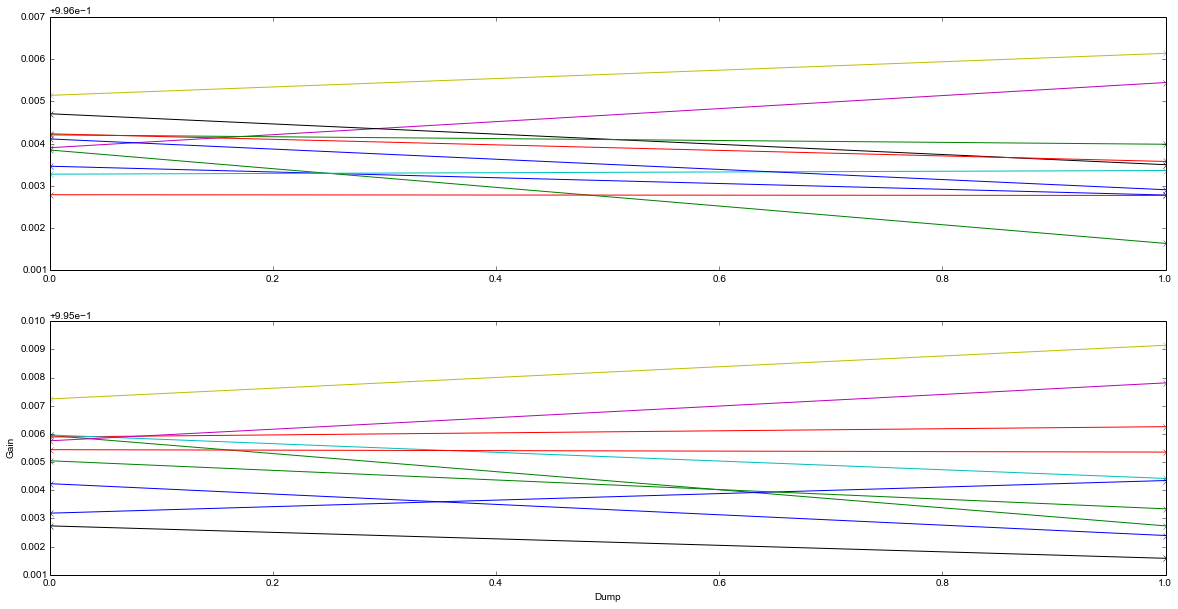

In [21]:
#plot gains - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(g_0),'-x');
#ax[0].set_ylim([0,5.0]);
ax[1].plot(np.abs(g_1),'-x');
#ax[1].set_ylim([0,5.0]);
plt.xlabel('Dump')
plt.ylabel('Gain')
plt.legend()

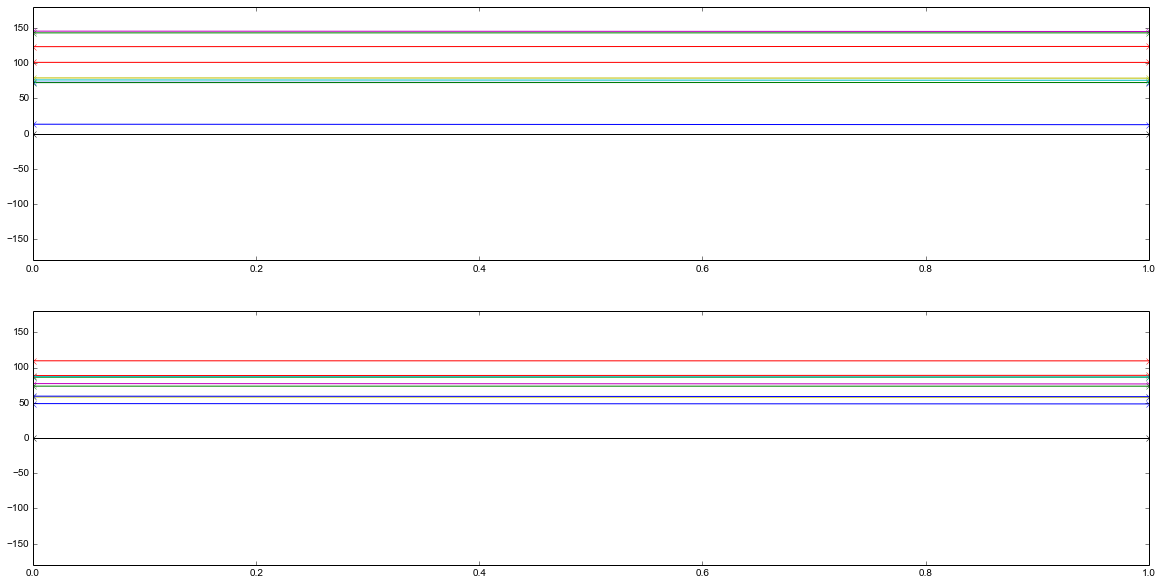

In [22]:
#plot gains - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(g_0)),'-x');
ax[0].set_ylim([-180,180]);
ax[1].plot(np.rad2deg(np.angle(g_1)),'-x');
ax[1].set_ylim([-180,180]);

# Bandpasses    

In [23]:
b = h.file['TelescopeState']['cal_product_B']
b_list = []
for i, bi in enumerate(b):
    b_list.append(pickle.loads(bi[-1]))
b_array = np.array(b_list)
print b_array.shape
# bandpass shape is ntimes x channels x pol x antenna 
# where ntimes is the number of bandpasses

# just look at LAST bandpass for now
b_0_0 = b_array[-1,:,0,:]
b_1_0 = b_array[-1,:,1,:]



(1, 4096, 2, 10)


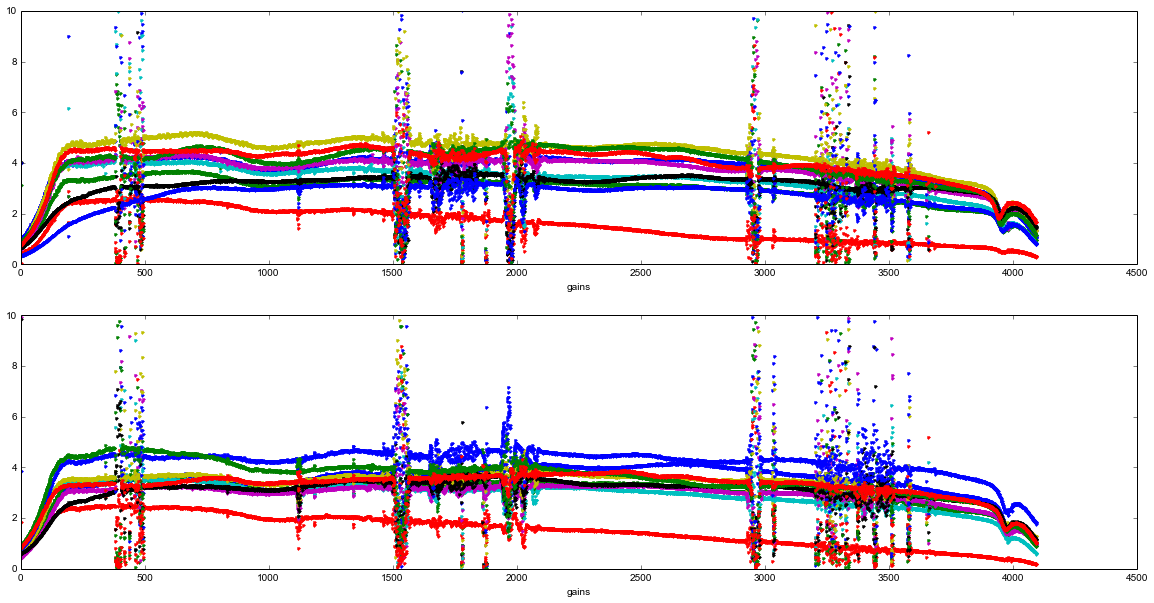

In [24]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_0),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_0),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

In [25]:
""""
for i in range(len(labels)):
    ax[0].plot(k_0[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[0].set_ylim([-0.2,0.2]);
    ax[1].plot(k_1[:,i],'-x',markersize=8,label=labels[i],color=colors[i]);
#ax[1].set_ylim([-0.2,0.2]);
plt.legend(loc='upper center')
"""

'"\nfor i in range(len(labels)):\n    ax[0].plot(k_0[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[0].set_ylim([-0.2,0.2]);\n    ax[1].plot(k_1[:,i],\'-x\',markersize=8,label=labels[i],color=colors[i]);\n#ax[1].set_ylim([-0.2,0.2]);\nplt.legend(loc=\'upper center\')\n'

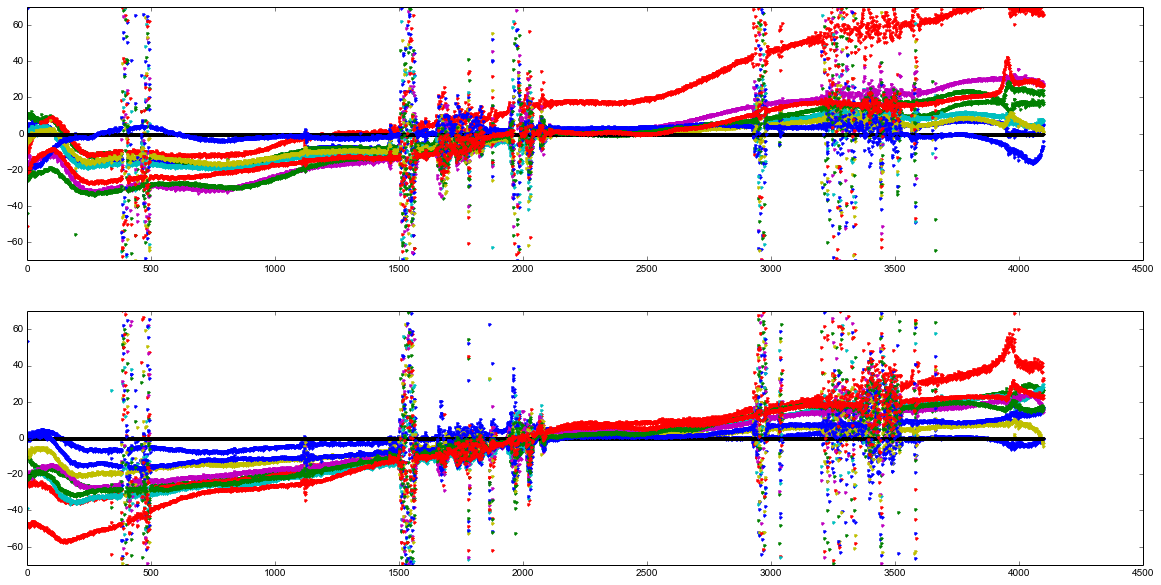

In [26]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].set_ylim([-70,70]);
ax[1].set_ylim([-70,70]);
ax[0].plot(np.rad2deg(np.angle(b_0_0)),'.');
ax[1].plot(np.rad2deg(np.angle(b_1_0)),'.');
plt.legend()

In [27]:
len(labels)

10

In [28]:
b_array.shape
# Time,channels,pols,antennas

(1, 4096, 2, 10)

In [29]:
#One bandpass at the END
antn=9
b_0_1 = b_array[-1,:,0,antn]
b_1_1 = b_array[-1,:,1,antn]
print b_1_1.shape
print a_array[:,antn]

(4096,)
['m063']


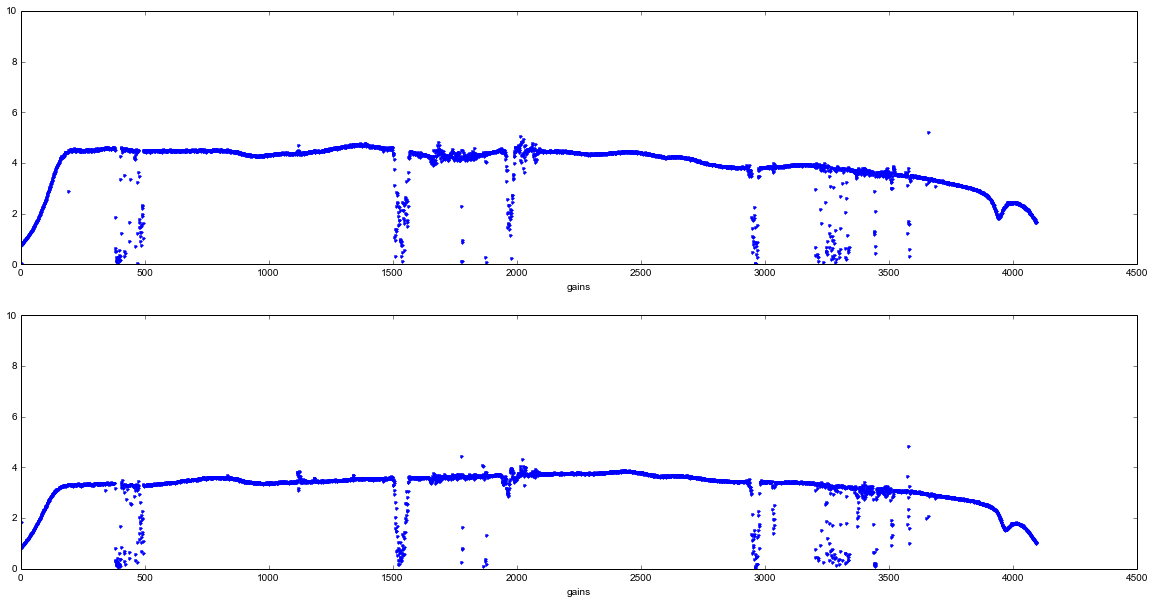

In [30]:
#plot bandpass - amplitude
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.abs(b_0_1),'.');
ax[0].set_ylim([0,10]);
ax[0].set_xlabel('gains')
ax[1].plot(np.abs(b_1_1),'.');
ax[1].set_ylim([0,10]);
ax[1].set_xlabel('gains')
#plt.xlabel('channel')
#plt.ylabel('gains')

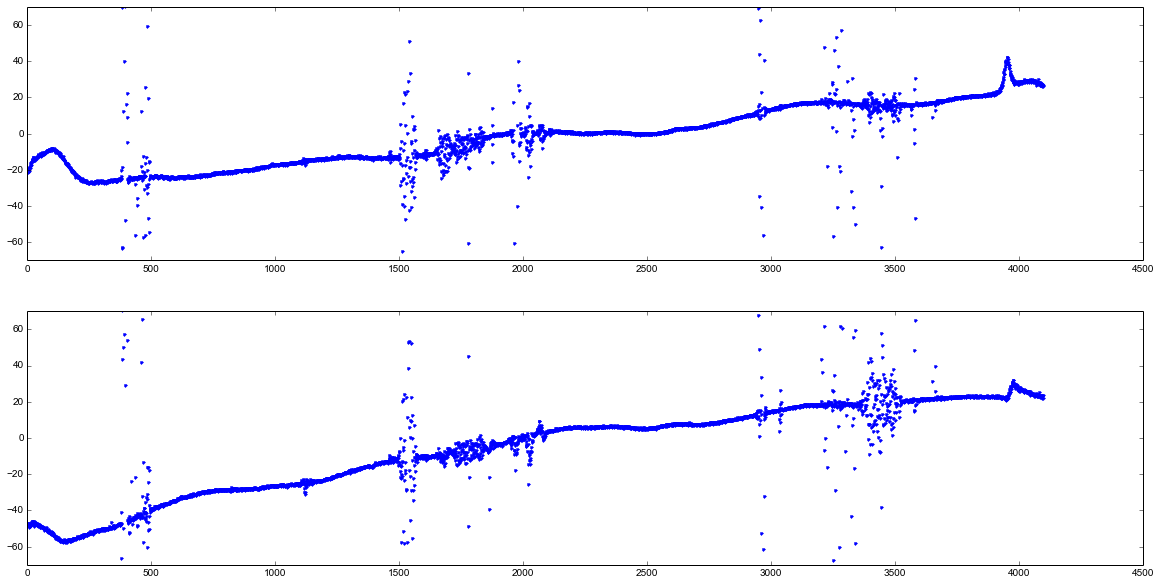

In [31]:
#plot bandpass - phase
fig, ax = plt.subplots(2,1,figsize=(20, 10))
ax[0].plot(np.rad2deg(np.angle(b_0_1)),'.');
ax[0].set_ylim([-70,70]);
ax[1].plot(np.rad2deg(np.angle(b_1_1)),'.');
ax[1].set_ylim([-70,70]);